<ipython-input-16-930839455>:14: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
<ipython-input-16-930839455>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Datetime'].dt.hour


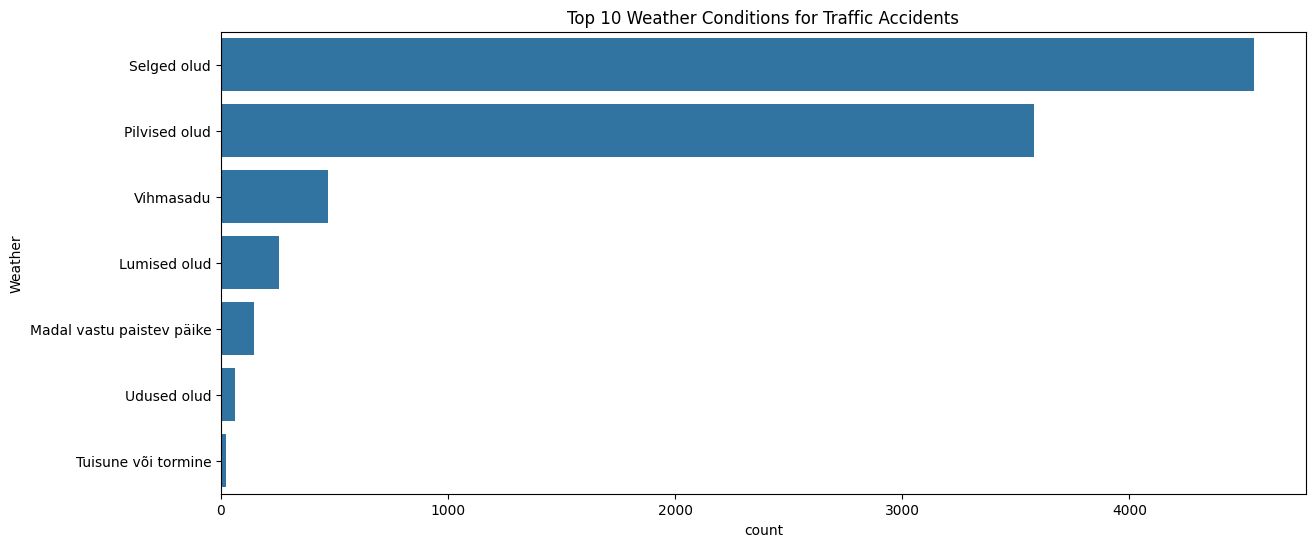

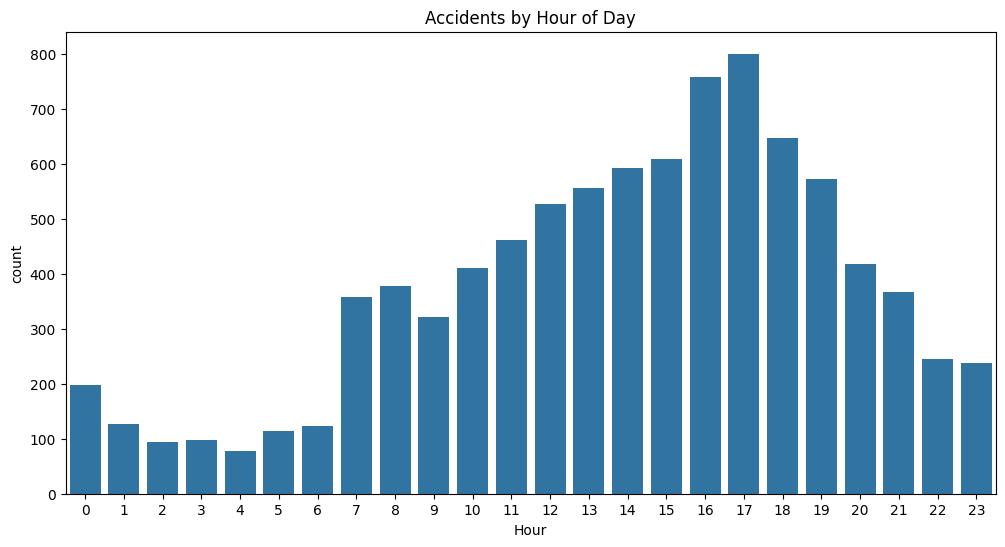

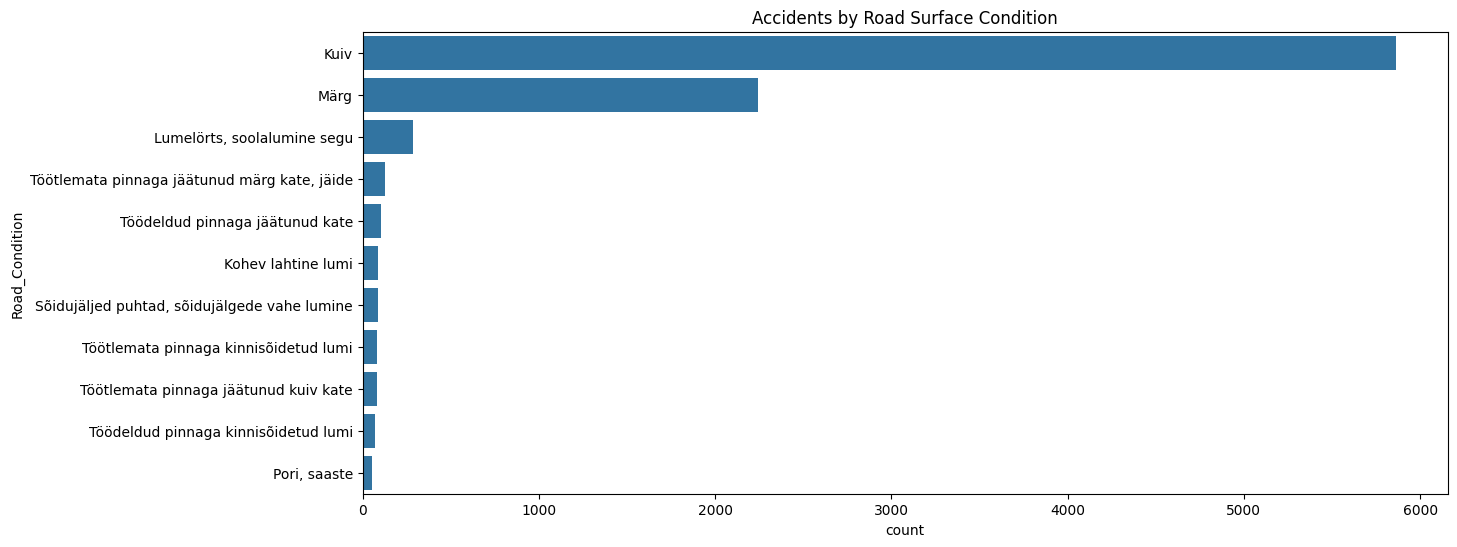

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/RTA_dataset.csv")

df = df.rename(columns={
    'Ilmastik [1]': 'Weather',
    'Teekatte seisund [2]': 'Road_Condition',
    'Toimumisaeg': 'Datetime'
})

df = df.dropna(subset=['Weather', 'Road_Condition', 'Datetime'])
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df = df.dropna(subset=['Datetime'])
df['Hour'] = df['Datetime'].dt.hour

plt.figure(figsize=(14,6))
sns.countplot(data=df, y='Weather', order=df['Weather'].value_counts().head(10).index)
plt.title('Top 10 Weather Conditions for Traffic Accidents')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(data=df, y='Road_Condition', order=df['Road_Condition'].value_counts().index)
plt.title('Accidents by Road Surface Condition')
plt.show()
